# Project Data Science - UTBK 2019 
## Sultan Fahrezy Syahdwinata Nugraha
### Started At 21/01/2023
<br>
<br>
<br>

## Imports

In [286]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Functions

In [287]:
def df_descr(x):
    print(str(x))
    x.info()
    total_rows, total_attributes = x.shape
    print()
    print('Jumlah data:', total_rows)
    print("Jumlah atribut:", total_attributes)

In [288]:
def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

In [289]:
def kdeplot(df, column):
    return sns.kdeplot(data=df, x=column)

In [290]:
def countplot(df, column):
    return sns.countplot(x= column, data=df)

## Penjelasan Dataset

### Mengenai Dataset
**Berikut merupakan penjelasan dataset ini dari kaggle**

UTBK SBMPTN is the annual college entrance exam held by and for state universities in Indonesia. This data was collected from a ranking site where exam takers could submit their score in order to gauge how well they did in comparison to others.

There are about 147 thousand samples (out of 1.1 million total scores) and this data is not indicative of the whole 1.1 million dataset as it is collected from a third-party sources (with maybe some invalid data strewn in). This dataset also contains the major picked by those exam-takers.


### Detail Dataset

Project ini menggunakan 4 buah dataset yang semuanya diambil dari sumber ini: https://www.kaggle.com/datasets/ekojsalim/indonesia-college-entrance-examination-utbk-2019?select=universities.csv 

Berikut merupakan daftar dataset beserta penjelasan atributnya:
1. **universities.csv** (2 Atribut | 85 Baris)
    * `id_university` - ID yang diberikan untuk setiap Universitas
    * `university_name` - Nama dari setiap Universitas
2. **majors.csv** (5 Atribut | 3167 Baris)
    * `id_major` - ID jurusan pada suatu universitas 
    * `id_university` - ID Universitas dimana jurusan tersebut berada
    * `type` - Jenis jurusan tersebut (Science / Humanities)
    * `major_name` - Nama jurusan
    * `capacity` - Kapasitas jurusan
3. **score_science.csv** (13 Atribut | 86570 Baris)
    * `id_first_major` - ID jurusan yang dipilih sebagai pilihan pertama
    * `id_first_university` - ID Universitas dimana jurusan pilihan pertama berada
    * `id_second_major` - ID jurusan yang dipilihn sebagai pilihan kedua
    * `id_second_university` - ID Universitas diamna jurusan pilihan kedua berada
    * `id_user` - ID peserta UTBK
    * `score_bio` - Skor pengerjaan Biologi
    * `score_fis` - Skor pengerjaan Fisika
    * `score_kim` - Skor pengerjaan Kimia
    * `score_kmb` - Skor pengerjaan Kemampuan Membaca
    * `score_kpu` - Skor pengerjaan Kemampuan Penalaran Umum
    * `score_kua` - Skor pengerjaan Kemampuan Kuantitatif
    * `score_mat` - Skor pengerjaan Matematika
    * `score_ppu` - Skor pengerjaan Pengetahuan Umum
4. **score_humanities.csv** (14 Atribut | 61202 Baris)
    * `id_first_major` - ID jurusan yang dipilih sebagai pilihan pertama
    * `id_first_university` - ID Universitas dimana jurusan pilihan pertama berada
    * `id_second_major` - ID jurusan yang dipilihn sebagai pilihan kedua
    * `id_second_university` - ID Universitas diamna jurusan pilihan kedua berada
    * `id_user` - ID peserta UTBK
    * `score_eko` - Skor pengerjaan Ekonomi
    * `score_geo` - Skor pengerjaan Geologi
    * `score_sej` - Skor pengerjaan Sejarah
    * `score_sos` - Skor pengerjaan Sosiologi
    * `score_kmb` - Skor pengerjaan Kemampuan Membaca
    * `score_kpu` - Skor pengerjaan Kemampuan Penalaran Umum
    * `score_kua` - Skor pengerjaan Kemampuan Kuantitatif
    * `score_mat` - Skor pengerjaan Matematika
    * `score_ppu` - Skor pengerjaan Pengetahuan Umum


## Memahami Dataset

### Import dan Menampilkan Data

In [291]:
# Import data
df_univ = pd.read_csv('universities.csv')
df_major = pd.read_csv('majors.csv')
df_sci = pd.read_csv('score_science.csv')
df_hum = pd.read_csv('score_humanities.csv')

In [292]:
# Menampilkan data sekilas
display(df_univ.head(5))
display(df_major.head(5))
display(df_sci.head(5))
display(df_hum.head(5))

,Unnamed: 0,id_university,university_name
0,0,111,UNIVERSITAS SYIAH KUALA
1,1,112,UNIVERSITAS MALIKUSSALEH
2,2,113,UNIVERSITAS TEUKU UMAR
3,3,114,UNIVERSITAS SAMUDRA
4,4,115,ISBI ACEH


,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1,1111022,111,science,TEKNIK SIPIL,64
2,2,1111037,111,science,TEKNIK MESIN,48
3,3,1111045,111,science,TEKNIK KIMIA,48
4,4,1111053,111,science,ARSITEKTUR,48


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370


,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674


In [293]:
# drop atribut index
df_univ = df_univ.drop(columns=['Unnamed: 0'])
df_major = df_major.drop(columns=['Unnamed: 0'])
df_sci = df_sci.drop(columns=['Unnamed: 0'])
df_hum = df_hum.drop(columns=['Unnamed: 0'])

In [294]:
# Menampilkan data sekilas
display(df_univ.head(5))
display(df_major.head(5))
display(df_sci.head(5))
display(df_hum.head(5))

,id_university,university_name
0,111,UNIVERSITAS SYIAH KUALA
1,112,UNIVERSITAS MALIKUSSALEH
2,113,UNIVERSITAS TEUKU UMAR
3,114,UNIVERSITAS SAMUDRA
4,115,ISBI ACEH


,id_major,id_university,type,major_name,capacity
0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1111022,111,science,TEKNIK SIPIL,64
2,1111037,111,science,TEKNIK MESIN,48
3,1111045,111,science,TEKNIK KIMIA,48
4,1111053,111,science,ARSITEKTUR,48


,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370


,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676
1,3212057,321,3322022,332,35,579,631,710,700,810,656,638,535,686
2,3722057,372,1912042,191,44,600,481,314,432,522,494,461,467,574
3,3212081,321,3212301,321,55,559,563,646,638,591,538,585,647,589
4,3812106,381,3852034,385,171,838,734,654,613,690,315,628,660,674


In [295]:
# Membuat dataframe baru gabungan jurusan dan universitas
df_major_univ = df_major.merge(df_univ, left_on='id_university', right_on='id_university')
list(df_major_univ.columns.values)

# Rearrange dataframe agar terlihat lebih bagus
df_major_univ = df_major_univ[['id_major',
 'id_university',
 'major_name',
 'university_name','type','capacity']]
df_major_univ

,id_major,id_university,major_name,university_name,type,capacity
0,1111014,111,PENDIDIKAN DOKTER HEWAN,UNIVERSITAS SYIAH KUALA,science,88
1,1111022,111,TEKNIK SIPIL,UNIVERSITAS SYIAH KUALA,science,64
2,1111037,111,TEKNIK MESIN,UNIVERSITAS SYIAH KUALA,science,48
3,1111045,111,TEKNIK KIMIA,UNIVERSITAS SYIAH KUALA,science,48
4,1111053,111,ARSITEKTUR,UNIVERSITAS SYIAH KUALA,science,48
...,...,...,...,...,...,...
3162,9132014,913,DESAIN KOMUNIKASI VISUAL,ISBI TANAH PAPUA,humanities,10
3163,9132022,913,SENI RUPA MURNI,ISBI TANAH PAPUA,humanities,10
3164,9132037,913,SENI KRIYA,ISBI TANAH PAPUA,humanities,11
3165,9132045,913,SENI MUSIK,ISBI TANAH PAPUA,humanities,11


In [296]:
# Menggabungkan dataframe nilai dengan nama jurusan, universitas agar lebih mudah dipahami

df_sci_mod = df_sci.copy()
df_sci_mod = df_sci_mod.merge(df_major_univ, left_on='id_first_major', right_on='id_major')
df_sci_mod = df_sci_mod.drop(columns=['id_first_major', 'id_first_university'])
df_sci_mod = df_sci_mod.merge(df_major_univ, left_on='id_second_major', right_on='id_major')
df_sci_mod = df_sci_mod.drop(columns=['id_second_major', 'id_second_university'])
df_sci_mod

,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,id_major_x,...,major_name_x,university_name_x,type_x,capacity_x,id_major_y,id_university_y,major_name_y,university_name_y,type_y,capacity_y
0,4,400,400,400,400,400,400,400,400,3321065,...,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,INSTITUT TEKNOLOGI BANDUNG,science,64,3331187,333,PSIKOLOGI,UNIVERSITAS PADJADJARAN,science,80
1,43597,704,447,630,561,518,541,585,599,3321065,...,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,INSTITUT TEKNOLOGI BANDUNG,science,64,3331187,333,PSIKOLOGI,UNIVERSITAS PADJADJARAN,science,80
2,174427,715,532,633,579,732,804,402,608,3321065,...,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,INSTITUT TEKNOLOGI BANDUNG,science,64,3331187,333,PSIKOLOGI,UNIVERSITAS PADJADJARAN,science,80
3,212163,446,511,400,548,679,567,513,538,3321065,...,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,INSTITUT TEKNOLOGI BANDUNG,science,64,3331187,333,PSIKOLOGI,UNIVERSITAS PADJADJARAN,science,80
4,257481,489,533,367,481,487,544,499,469,3321065,...,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,INSTITUT TEKNOLOGI BANDUNG,science,64,3331187,333,PSIKOLOGI,UNIVERSITAS PADJADJARAN,science,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86564,284331,336,466,476,511,378,393,589,470,7521052,...,PENDIDIKAN GEOGRAFI,UNIVERSITAS NEGERI GORONTALO,science,54,7521334,752,PENDIDIKAN ILMU PENGETAHUAN ALAM,UNIVERSITAS NEGERI GORONTALO,science,27
86565,291267,520,483,654,545,606,722,425,495,5511107,...,AKUAKULTUR,UNIVERSITAS BORNEO TARAKAN,science,48,5511034,551,AGRIBISNIS,UNIVERSITAS BORNEO TARAKAN,science,48
86566,293644,435,413,441,408,516,526,564,390,1111343,...,AGROTEKNOLOGI (PSDKU GAYO LUES),UNIVERSITAS SYIAH KUALA,science,20,1111366,111,KEHUTANAN (PSDKU GAYO LUES),UNIVERSITAS SYIAH KUALA,science,16
86567,313981,482,516,453,546,569,597,587,633,5211255,...,KIMIA,UNIVERSITAS PALANGKARAYA,science,30,5211247,521,FISIKA,UNIVERSITAS PALANGKARAYA,science,30


In [297]:
# Menggabungkan dataframe nilai dengan nama jurusan, universitas agar lebih mudah dipahami

df_hum_mod = df_hum.copy()
df_hum_mod = df_hum_mod.merge(df_major_univ, left_on='id_first_major', right_on='id_major')
df_hum_mod = df_hum_mod.drop(columns=['id_first_major', 'id_first_university'])
df_hum_mod = df_hum_mod.merge(df_major_univ, left_on='id_second_major', right_on='id_major')
df_hum_mod = df_hum_mod.drop(columns=['id_second_major', 'id_second_university'])
df_hum_mod

,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,...,major_name_x,university_name_x,type_x,capacity_x,id_major_y,id_university_y,major_name_y,university_name_y,type_y,capacity_y
0,26,778,486,679,594,643,686,559,392,676,...,FAKULTAS SENIRUPA DAN DESAIN (FSRD),INSTITUT TEKNOLOGI BANDUNG,humanities,100,3532154,353,DESAIN KOMUNIKASI VISUAL,UNIVERSITAS SEBELAS MARET,humanities,30
1,15713,803,638,659,696,685,494,576,676,694,...,FAKULTAS SENIRUPA DAN DESAIN (FSRD),INSTITUT TEKNOLOGI BANDUNG,humanities,100,3532154,353,DESAIN KOMUNIKASI VISUAL,UNIVERSITAS SEBELAS MARET,humanities,30
2,24011,601,560,575,611,629,509,607,775,629,...,FAKULTAS SENIRUPA DAN DESAIN (FSRD),INSTITUT TEKNOLOGI BANDUNG,humanities,100,3532154,353,DESAIN KOMUNIKASI VISUAL,UNIVERSITAS SEBELAS MARET,humanities,30
3,25412,612,494,524,549,589,548,508,617,548,...,FAKULTAS SENIRUPA DAN DESAIN (FSRD),INSTITUT TEKNOLOGI BANDUNG,humanities,100,3532154,353,DESAIN KOMUNIKASI VISUAL,UNIVERSITAS SEBELAS MARET,humanities,30
4,37291,493,573,586,582,504,641,608,474,560,...,FAKULTAS SENIRUPA DAN DESAIN (FSRD),INSTITUT TEKNOLOGI BANDUNG,humanities,100,3532154,353,DESAIN KOMUNIKASI VISUAL,UNIVERSITAS SEBELAS MARET,humanities,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61193,290905,287,423,488,447,501,498,428,453,457,...,BIMBINGAN KONSELING,UNIVERSITAS NUSA CENDANA,humanities,68,6312097,631,PEND. ANAK USIA DINI,UNIVERSITAS NUSA CENDANA,humanities,45
61194,298546,469,541,578,416,446,618,331,572,435,...,PENDIDIKAN JASMANI KESEHATAN DAN REKREASI,UNIVERSITAS NEGERI GORONTALO,humanities,90,7522167,752,PENDIDIKAN KEPELATIHAN,UNIVERSITAS NEGERI GORONTALO,humanities,54
61195,306424,612,455,482,453,408,527,447,434,501,...,PENDIDIKAN SENDRATASIK,UNIVERSITAS PALANGKARAYA,humanities,24,5212073,521,PEND. GURU PEND ANAK USIA DINI (PG PAUD),UNIVERSITAS PALANGKARAYA,humanities,34
61196,315742,511,351,417,412,463,493,434,616,373,...,SOSIOLOGI,UNIVERSITAS TADULAKO,humanities,105,7312066,731,PEND. GURU SEKOLAH DASAR,UNIVERSITAS TADULAKO,humanities,75


### Deskripsi Dataset

In [298]:
df_list = [df_univ, df_major, df_sci_mod, df_hum_mod]
for i in df_list:
    df_descr(i)

    id_university              university_name
0             111      UNIVERSITAS SYIAH KUALA
1             112     UNIVERSITAS MALIKUSSALEH
2             113       UNIVERSITAS TEUKU UMAR
3             114          UNIVERSITAS SAMUDRA
4             115                    ISBI ACEH
..            ...                          ...
80            821          UNIVERSITAS KHAIRUN
81            911     UNIVERSITAS CENDERAWASIH
82            912  UNIVERSITAS MUSAMUS MERAUKE
83            913             ISBI TANAH PAPUA
84            921            UNIVERSITAS PAPUA

[85 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_university    85 non-null     int64 
 1   university_name  85 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB

Jumlah data: 85
Jumlah atribut: 2
      id_major  id_university        type     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61198 entries, 0 to 61197
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_user            61198 non-null  int64 
 1   score_eko          61198 non-null  int64 
 2   score_geo          61198 non-null  int64 
 3   score_kmb          61198 non-null  int64 
 4   score_kpu          61198 non-null  int64 
 5   score_kua          61198 non-null  int64 
 6   score_mat          61198 non-null  int64 
 7   score_ppu          61198 non-null  int64 
 8   score_sej          61198 non-null  int64 
 9   score_sos          61198 non-null  int64 
 10  id_major_x         61198 non-null  int64 
 11  id_university_x    61198 non-null  int64 
 12  major_name_x       61198 non-null  object
 13  university_name_x  61198 non-null  object
 14  type_x             61198 non-null  object
 15  capacity_x         61198 non-null  int64 
 16  id_major_y         61198 non-null  int64

#### Numerik

In [299]:
# drop atribut id dan kategorik terlebih dahulu
df_nilai_sci = df_sci_mod.drop(columns=['id_user','major_name_x', 'university_name_x', 'type_x', 'major_name_y', 'university_name_y','type_y', 'id_major_x', 'id_university_x', 'capacity_x', 'id_major_y', 'id_university_y', 'id_university_y', 'capacity_y'])
df_nilai_sci.describe()

,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
count,86569.000000,86569.000000,86569.000000,86569.000000,86569.000000,86569.000000,86569.000000,86569.000000
mean,537.140350,539.335813,544.596853,565.797214,569.941827,569.145676,529.488108,544.597535
std,96.597169,102.293579,112.595480,95.167044,91.224086,111.385509,99.464603,87.436811
min,245.000000,252.000000,213.000000,198.000000,193.000000,266.000000,219.000000,219.000000
25%,471.000000,468.000000,465.000000,500.000000,508.000000,489.000000,463.000000,487.000000
50%,531.000000,531.000000,536.000000,565.000000,571.000000,563.000000,520.000000,547.000000
75%,597.000000,604.000000,616.000000,632.000000,633.000000,645.000000,586.000000,604.000000
max,1000.000000,1070.000000,1044.000000,908.000000,881.000000,922.000000,1123.000000,842.000000


In [300]:
df_nilai_hum = df_hum_mod.drop(columns=['id_user','major_name_x', 'university_name_x', 'type_x', 'major_name_y', 'university_name_y','type_y', 'id_major_x', 'id_university_x', 'capacity_x', 'id_major_y', 'id_university_y', 'id_university_y', 'capacity_y'])
df_nilai_hum.describe()

,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
count,61198.000000,61198.000000,61198.000000,61198.000000,61198.00000,61198.000000,61198.000000,61198.000000,61198.000000
mean,547.779535,546.767754,552.027141,539.691902,520.86225,531.077731,530.602144,540.408821,542.477891
std,100.335250,94.412337,103.937567,84.778469,96.01305,120.143554,87.542664,99.377838,101.514877
min,0.000000,252.000000,150.000000,218.000000,266.00000,219.000000,204.000000,222.000000,238.000000
25%,479.000000,482.000000,482.000000,482.000000,453.00000,452.000000,472.000000,471.000000,474.000000
50%,543.000000,547.000000,550.000000,538.000000,513.00000,517.000000,532.000000,540.000000,536.000000
75%,612.000000,612.000000,621.000000,595.000000,580.00000,596.000000,590.000000,609.000000,605.000000
max,1017.000000,969.000000,908.000000,858.000000,921.00000,1117.000000,843.000000,939.000000,975.000000


#### Kategorik

In [301]:
df_utbk_sci_kategorik = df_sci_mod[['id_user','major_name_x', 'university_name_x', 'type_x', 'major_name_y', 'university_name_y','type_y', 'id_major_x', 'id_university_x', 'capacity_x', 'id_major_y', 'id_university_y', 'id_university_y', 'capacity_y']]
df_utbk_sci_kategorik.describe(include=object)

,major_name_x,university_name_x,type_x,major_name_y,university_name_y,type_y
count,86569,86569,86569,86569,86569,86569
unique,348,78,2,361,79,2
top,PENDIDIKAN DOKTER,UNIVERSITAS BRAWIJAYA,science,PENDIDIKAN DOKTER,UNIVERSITAS BRAWIJAYA,science
freq,5795,6209,86564,3620,6013,86565


In [302]:
df_utbk_hum_kategorik = df_hum_mod[['id_user','major_name_x', 'university_name_x', 'type_x', 'major_name_y', 'university_name_y','type_y', 'id_major_x', 'id_university_x', 'capacity_x', 'id_major_y', 'id_university_y', 'id_university_y', 'capacity_y']]
df_utbk_hum_kategorik.describe(include=object)

,major_name_x,university_name_x,type_x,major_name_y,university_name_y,type_y
count,61198,61198,61198,61198,61198,61198
unique,436,82,1,456,82,1
top,MANAJEMEN,UNIVERSITAS INDONESIA,humanities,MANAJEMEN,UNIVERSITAS PENDIDIKAN INDONESIA,humanities
freq,5297,4472,61198,5195,3441,61198


### Missing Values

In [303]:
# data utbk science
cek_missing_values(df_sci_mod)

,Total,Percent


In [304]:
# data utbk humaniora
cek_missing_values(df_hum_mod)

,Total,Percent


### Duplikasi Data

In [305]:
# data utbk science
stats = df_sci_mod.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


,redundant


In [306]:
# data utbk humaniora
stats = df_hum_mod.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


,redundant


### Outliers

In [307]:
# Variabel untuk outliers UTBK Science
Q3 = df_nilai_sci.quantile(0.75)
Q1 = df_nilai_sci.quantile(0.25)
IQR = Q3-Q1

In [308]:
Jumlah_Outlier0 = []

for col in df_nilai_sci.select_dtypes(np.number).columns:
    outliers = ((df_nilai_sci[col] < (Q1[col] - 1.5 * IQR[col])) | (df_nilai_sci[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier0.append([col, outliers, outliers/len(df_nilai_sci)])
    
indexOutput0 = list(range(0, len(Jumlah_Outlier0)))

pd.DataFrame(Jumlah_Outlier0, columns=['Column', 'Outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,score_mat,1770,0.020446
1,score_bio,1011,0.011679
2,score_fis,818,0.009449
3,score_kim,735,0.008490
4,score_ppu,462,0.005337
5,score_kpu,427,0.004932
6,score_kmb,288,0.003327
7,score_kua,201,0.002322


In [309]:
# Variabel untuk outliers UTBK Humaniora
Q3 = df_nilai_hum.quantile(0.75)
Q1 = df_nilai_hum.quantile(0.25)
IQR = Q3-Q1

In [310]:
Jumlah_Outlier0 = []

for col in df_nilai_hum.select_dtypes(np.number).columns:
    outliers = ((df_nilai_hum[col] < (Q1[col] - 1.5 * IQR[col])) | (df_nilai_hum[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier0.append([col, outliers, outliers/len(df_nilai_hum)])
    
indexOutput0 = list(range(0, len(Jumlah_Outlier0)))

pd.DataFrame(Jumlah_Outlier0, columns=['Column', 'Outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,score_mat,1506,0.024609
1,score_sos,763,0.012468
2,score_kua,708,0.011569
3,score_eko,565,0.009232
4,score_kpu,491,0.008023
5,score_kmb,470,0.007680
6,score_geo,265,0.004330
7,score_ppu,237,0.003873
8,score_sej,191,0.003121


#### Melihat persebaran data untuk handling outliers

#### Science

<AxesSubplot: xlabel='score_mat', ylabel='Density'>

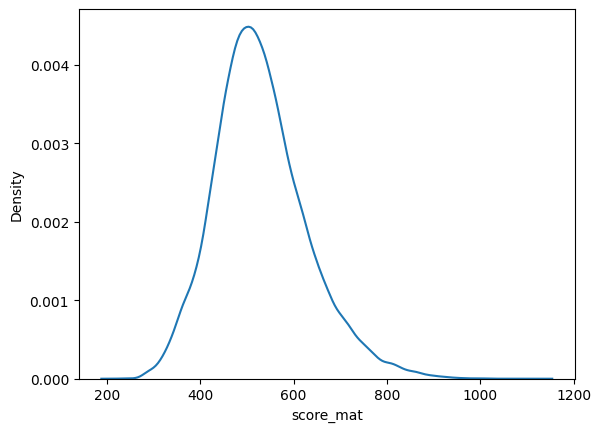

In [311]:
kdeplot(df_nilai_sci, 'score_mat')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_bio', ylabel='Density'>

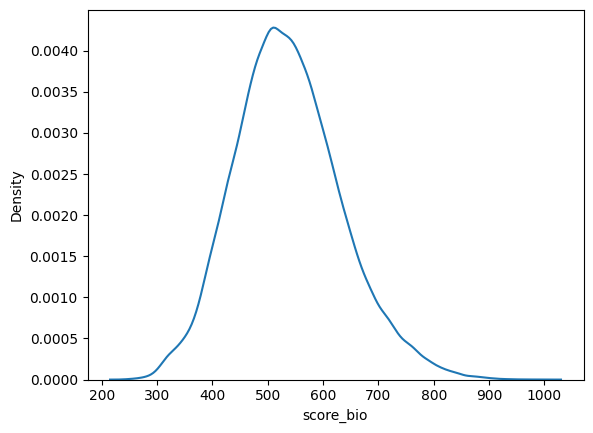

In [312]:
kdeplot(df_nilai_sci, 'score_bio')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_fis', ylabel='Density'>

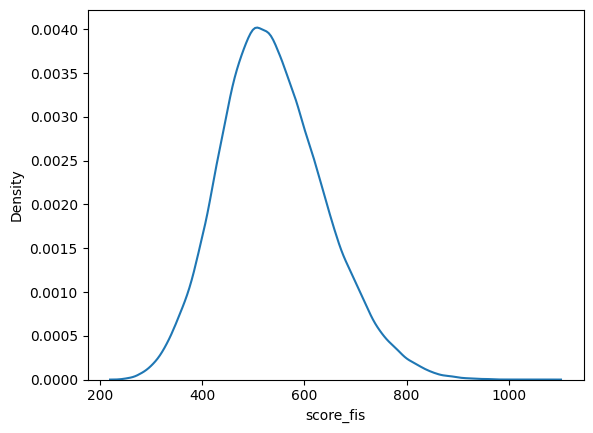

In [313]:
kdeplot(df_nilai_sci, 'score_fis')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_kim', ylabel='Density'>

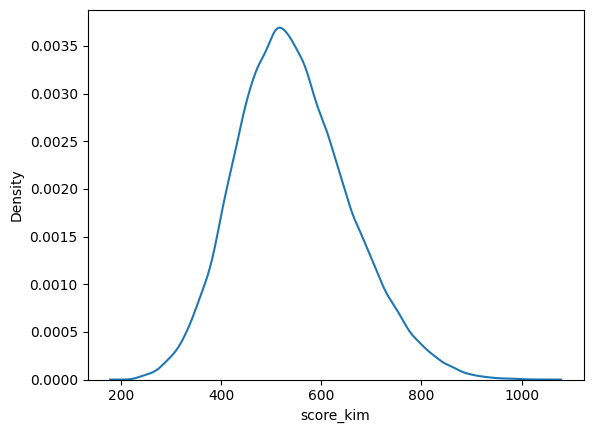

In [314]:
kdeplot(df_nilai_sci, 'score_kim')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_ppu', ylabel='Density'>

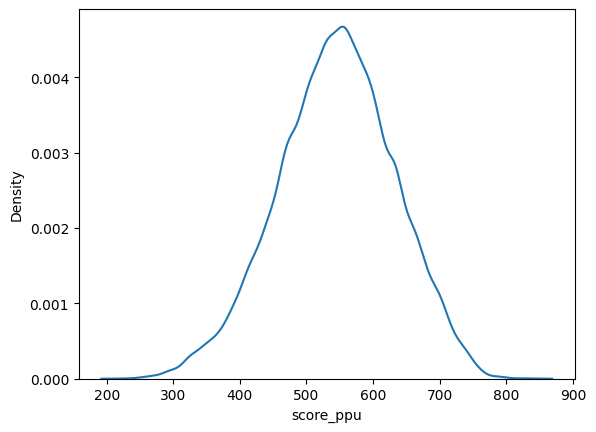

In [315]:
kdeplot(df_nilai_sci, 'score_ppu')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_kpu', ylabel='Density'>

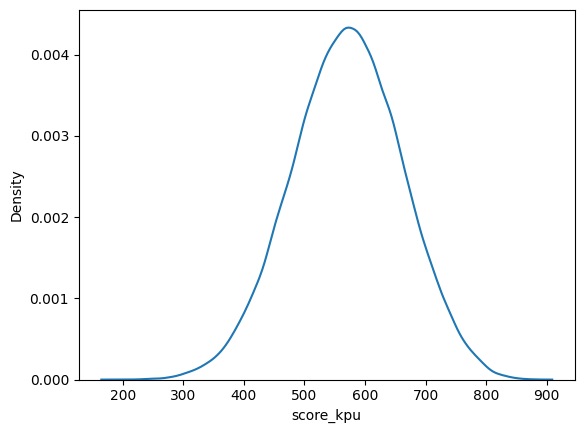

In [316]:
kdeplot(df_nilai_sci, 'score_kpu')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_kmb', ylabel='Density'>

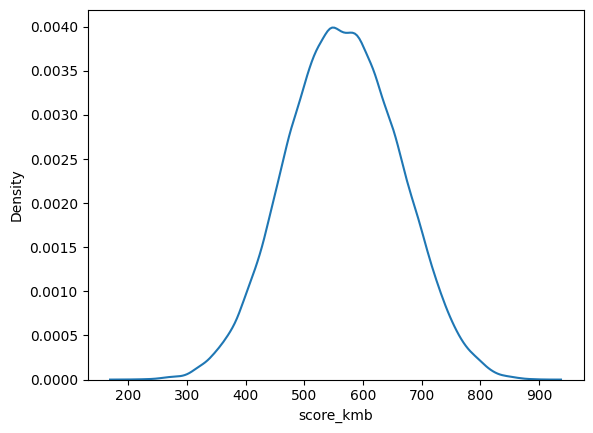

In [317]:
kdeplot(df_nilai_sci, 'score_kmb')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_kua', ylabel='Density'>

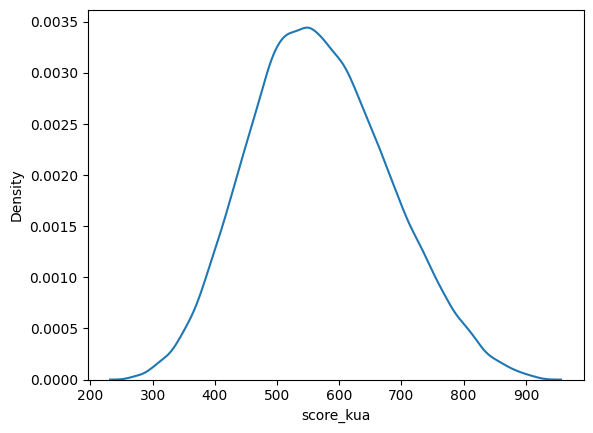

In [318]:
kdeplot(df_nilai_sci, 'score_kua')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

#### Humaniora

<AxesSubplot: xlabel='score_mat', ylabel='Density'>

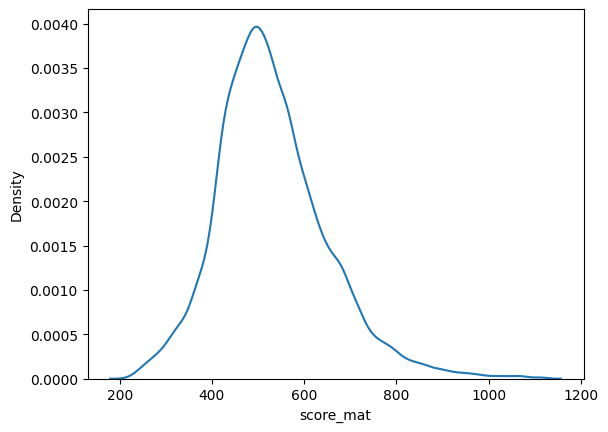

In [319]:
kdeplot(df_nilai_hum, 'score_mat')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_sos', ylabel='Density'>

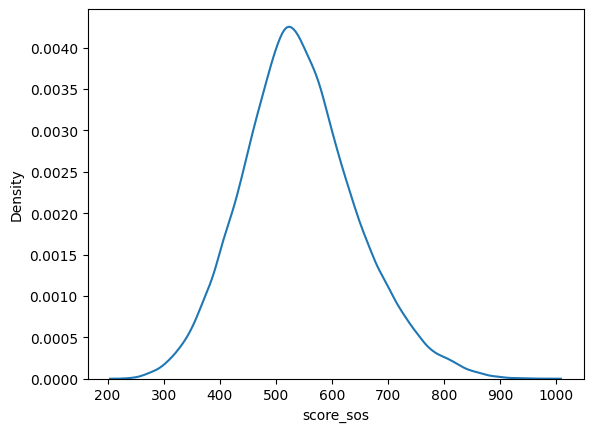

In [320]:
kdeplot(df_nilai_hum, 'score_sos')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_kua', ylabel='Density'>

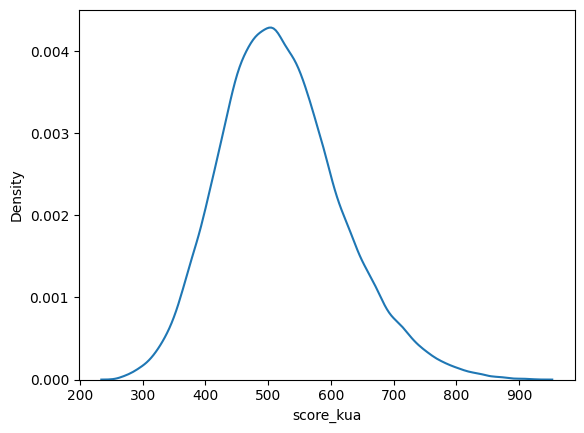

In [321]:
kdeplot(df_nilai_hum, 'score_kua')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_eko', ylabel='Density'>

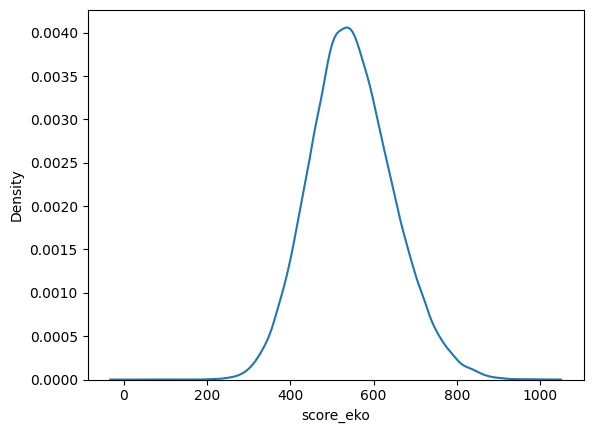

In [322]:
kdeplot(df_nilai_hum, 'score_eko')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_kpu', ylabel='Density'>

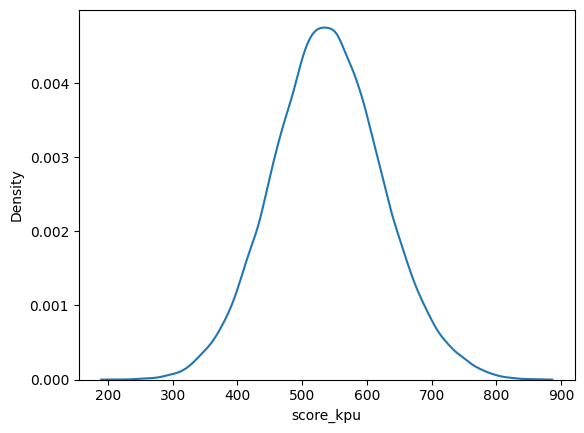

In [323]:
kdeplot(df_nilai_hum, 'score_kpu')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_kmb', ylabel='Density'>

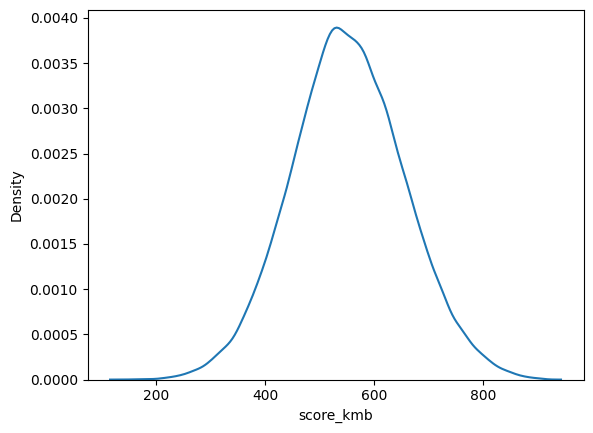

In [324]:
kdeplot(df_nilai_hum, 'score_kmb')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_geo', ylabel='Density'>

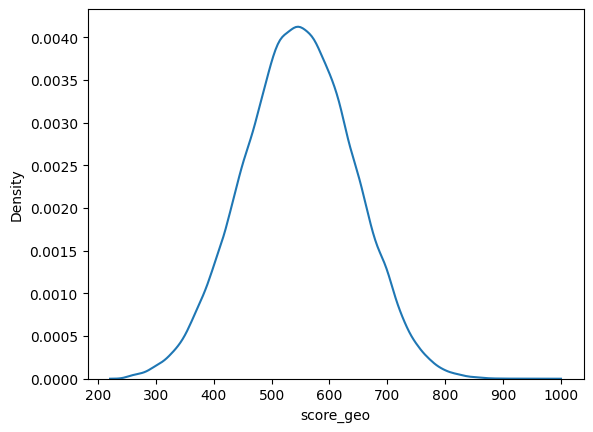

In [325]:
kdeplot(df_nilai_hum, 'score_geo')

persebaran tidak skewed maka akan digunakan mean untuk handling outlier

<AxesSubplot: xlabel='score_ppu', ylabel='Density'>

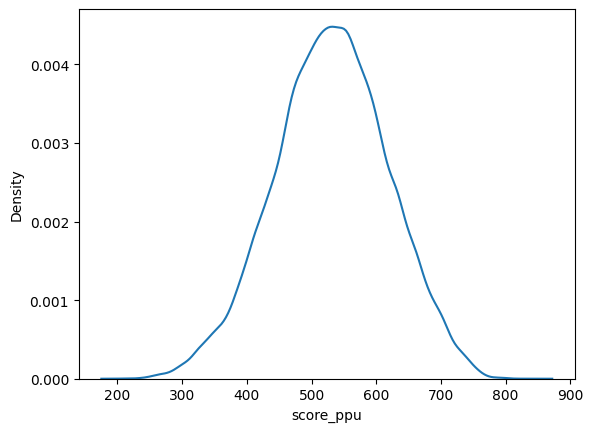

In [326]:
kdeplot(df_nilai_hum, 'score_ppu')

persebaran tidak skewed maka akan digunakan median untuk handling outlier

<AxesSubplot: xlabel='score_sej', ylabel='Density'>

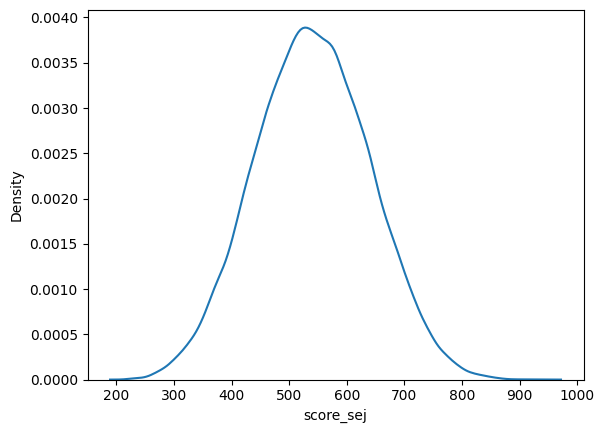

In [327]:
kdeplot(df_nilai_hum, 'score_sej')

persebaran tidak skewed maka akan digunakan median untuk handling outlier

## Preprocessing

### Drop Atribut 

Terdapat beberapa atribut pada dataset yang kita gunakan yang tidak akan memberikan value apapun ke pengerjaan kita sehingga akan kita drop saja. Atribut tersebut meliputi atribut id-id yang ada.

In [328]:
cleaned_sci = df_sci_mod.drop(['id_user','id_university_x','id_university_y'],axis=1)
cleaned_hum = df_hum_mod.drop(['id_user','id_university_x','id_university_y'],axis=1)

### Handle Missing Values

In [329]:
# data utbk science
cek_missing_values(cleaned_sci)

,Total,Percent


In [330]:
# data utbk humaniora
cek_missing_values(cleaned_hum)

,Total,Percent


Tidak ada missing values.

### Handle Data Redundan

In [331]:
# data utbk science
stats = cleaned_sci.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    25
dtype: int64


,redundant
6051,True
6052,True
10655,True
22784,True
23204,True
35351,True
36314,True
45193,True
45742,True
48663,True


In [332]:
print("Jumlah data: {}".format(cleaned_sci.shape[0]))

Jumlah data: 86569


drop duplikat dengan pertimbangan: 
 * menyimpan informasi yang sama, 
 * kemungkinan besar disebabkan oleh kesalahan input karena kecil kemungkinan ada 2 orang dengan nilai utbk dan pilihan yang sama persis



In [333]:
cleaned_sci = cleaned_sci.drop_duplicates(ignore_index=True)

In [334]:
# data utbk science
stats = cleaned_sci.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


,redundant


In [335]:
print("Jumlah data: {} (berkurang 25)".format(cleaned_sci.shape[0]))

Jumlah data: 86544 (berkurang 25)


In [336]:
# data utbk humaniora
stats = cleaned_hum.duplicated().to_frame("redundant")
red = stats[stats["redundant"] == True].count()
print("Jumlah data " + str(red))
stats[stats["redundant"] == True]

Jumlah data redundant    0
dtype: int64


,redundant


Tidak ada data redundan untuk humaniora.

### Handle Outliers

In [337]:
# Variabel untuk outliers UTBK Science
cleaned_sci_out = cleaned_sci.copy()
Q3 = cleaned_sci_out.quantile(0.75)
Q1 = cleaned_sci_out.quantile(0.25)
IQR = Q3-Q1

C:\Users\eji\AppData\Local\Temp\ipykernel_12412\1543625571.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = cleaned_sci_out.quantile(0.75)
C:\Users\eji\AppData\Local\Temp\ipykernel_12412\1543625571.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = cleaned_sci_out.quantile(0.25)


In [338]:
Jumlah_Outlier0 = []

for col in cleaned_sci_out.drop(['id_major_y','id_major_x','capacity_y', 'capacity_x'],axis=1).select_dtypes(np.number).columns:
    outliers = ((cleaned_sci_out[col] < (Q1[col] - 1.5 * IQR[col])) | (cleaned_sci_out[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier0.append([col, outliers, outliers/len(cleaned_sci_out)])
    
indexOutput0 = list(range(0, len(Jumlah_Outlier0)))

pd.DataFrame(Jumlah_Outlier0, columns=['Column', 'Outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,score_mat,1769,0.020440
1,score_bio,1011,0.011682
2,score_fis,818,0.009452
3,score_kim,735,0.008493
4,score_ppu,461,0.005327
5,score_kpu,427,0.004934
6,score_kmb,288,0.003328
7,score_kua,201,0.002323


In [339]:
outlier_var = cleaned_sci_out.drop(['id_major_y','id_major_x','capacity_y', 'capacity_x'],axis=1).select_dtypes(np.number).columns

for var in outlier_var:
    print("skewness variable {} adalah {}".format(var, cleaned_sci[var].skew()))

skewness variable score_bio adalah 0.3726202021160734
skewness variable score_fis adalah 0.37870574070183116
skewness variable score_kim adalah 0.3681088678525053
skewness variable score_kmb adalah 0.0029260898660024995
skewness variable score_kpu adalah -0.0799994993886219
skewness variable score_kua adalah 0.2202621184274498
skewness variable score_mat adalah 0.5964457579239146
skewness variable score_ppu adalah -0.1541015640264647


Berdasarkan referensi (https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html) nilai skewness untuk data dengan distribusi normal berada pada rentang [-0.5, 0.5] dimana sesuai juga dengan visualisasi yang telah diberikan, semua variabel kecuali satu yakni `score_mat` memiliki distribusi normal.

Sehingga untuk semua variabel kecuali `score_mat` akan digunakan mean, sementara `score_mat` akan menggunakan median.

In [340]:
## Mencari index dari data yang termasuk outlier
outlier_data = []

for col in outlier_var:
  outliers = cleaned_sci_out.index[ (cleaned_sci_out[col] < (Q1[col] - 1.5 * IQR[col])) | (cleaned_sci_out[col] > (Q3[col] + 1.5 * IQR[col])) ]
  outlier_data.append([col, outliers])

## Mengganti outliers dengan nilai median dari masing-masing kolom
for col in outlier_data:
    if(col[0] == 'score_mat'):
        median = cleaned_sci_out[col[0]].median()
        for idx in col[1]:
            cleaned_sci_out.loc[idx, col[0]] = median
    else:
        mean = cleaned_sci_out[col[0]].mean()
        for idx in col[1]:
            cleaned_sci_out.loc[idx, col[0]] = mean

In [341]:
Jumlah_Outlier1 = []

for col in cleaned_sci_out.drop(['id_major_y','id_major_x','capacity_y', 'capacity_x'],axis=1).select_dtypes(np.number).columns:
    outliers = ((cleaned_sci_out[col] < (Q1[col] - 1.5 * IQR[col])) | (cleaned_sci_out[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier1.append([col, outliers, outliers/len(cleaned_sci_out)])
    
indexOutput1 = list(range(0, len(Jumlah_Outlier1)))

pd.DataFrame(Jumlah_Outlier1, columns=['Column', 'Outlier','persentase'],index=indexOutput1).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,score_bio,0,0.0
1,score_fis,0,0.0
2,score_kim,0,0.0
3,score_kmb,0,0.0
4,score_kpu,0,0.0
5,score_kua,0,0.0
6,score_mat,0,0.0
7,score_ppu,0,0.0


Pembersihan outlier ini dilakukan untuk mempersiapkan semisalnya diperlukan untuk model yang tidak bisa menerima outliers. Data biasa akan tetap digunakan untuk eksplorasi dan visualisasi selain itu.

In [342]:
# Variabel untuk outliers UTBK Science
cleaned_hum_out = cleaned_hum.copy()
Q3 = cleaned_hum.quantile(0.75)
Q1 = cleaned_hum.quantile(0.25)
IQR = Q3-Q1

C:\Users\eji\AppData\Local\Temp\ipykernel_12412\1931217868.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = cleaned_hum.quantile(0.75)
C:\Users\eji\AppData\Local\Temp\ipykernel_12412\1931217868.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = cleaned_hum.quantile(0.25)


In [343]:
Jumlah_Outlier0 = []

for col in cleaned_hum_out.drop(['id_major_y','id_major_x','capacity_y', 'capacity_x'],axis=1).select_dtypes(np.number).columns:
    outliers = ((cleaned_hum_out[col] < (Q1[col] - 1.5 * IQR[col])) | (cleaned_hum_out[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier0.append([col, outliers, outliers/len(cleaned_hum_out)])
    
indexOutput0 = list(range(0, len(Jumlah_Outlier0)))

pd.DataFrame(Jumlah_Outlier0, columns=['Column', 'Outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,score_mat,1506,0.024609
1,score_sos,763,0.012468
2,score_kua,708,0.011569
3,score_eko,565,0.009232
4,score_kpu,491,0.008023
5,score_kmb,470,0.007680
6,score_geo,265,0.004330
7,score_ppu,237,0.003873
8,score_sej,191,0.003121


In [344]:
outlier_var = cleaned_hum_out.drop(['id_major_y','id_major_x','capacity_y', 'capacity_x'],axis=1).select_dtypes(np.number).columns

for var in outlier_var:
    print("skewness variable {} adalah {}".format(var, cleaned_hum_out[var].skew()))

skewness variable score_eko adalah 0.25145795789580416
skewness variable score_geo adalah -0.007645040415041152
skewness variable score_kmb adalah 0.048890334911794356
skewness variable score_kpu adalah 0.08564610691545997
skewness variable score_kua adalah 0.44175159332867914
skewness variable score_mat adalah 0.7781773732129779
skewness variable score_ppu adalah -0.09255751005843886
skewness variable score_sej adalah 0.038102896600142655
skewness variable score_sos adalah 0.3131525297273478


Berdasarkan referensi (https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html) nilai skewness untuk data dengan distribusi normal berada pada rentang [-0.5, 0.5] dimana sesuai juga dengan visualisasi yang telah diberikan, semua variabel kecuali satu yakni `score_mat` memiliki distribusi normal.

Sehingga untuk semua variabel kecuali `score_mat` akan digunakan mean, sementara `score_mat` akan menggunakan median.

In [345]:
## Mencari index dari data yang termasuk outlier
outlier_data = []

for col in outlier_var:
  outliers = cleaned_hum_out.index[ (cleaned_hum_out[col] < (Q1[col] - 1.5 * IQR[col])) | (cleaned_hum_out[col] > (Q3[col] + 1.5 * IQR[col])) ]
  outlier_data.append([col, outliers])

## Mengganti outliers dengan nilai median dari masing-masing kolom
for col in outlier_data:
    if(col[0] == 'score_mat'):
        median = cleaned_hum_out[col[0]].median()
        for idx in col[1]:
            cleaned_hum_out.loc[idx, col[0]] = median
    else:
        mean = cleaned_hum_out[col[0]].mean()
        for idx in col[1]:
            cleaned_hum_out.loc[idx, col[0]] = mean

In [346]:
Jumlah_Outlier1 = []

for col in cleaned_hum_out.drop(['id_major_y','id_major_x','capacity_y', 'capacity_x'],axis=1).select_dtypes(np.number).columns:
    outliers = ((cleaned_hum_out[col] < (Q1[col] - 1.5 * IQR[col])) | (cleaned_hum_out[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier1.append([col, outliers, outliers/len(cleaned_hum_out)])
    
indexOutput1 = list(range(0, len(Jumlah_Outlier1)))

pd.DataFrame(Jumlah_Outlier1, columns=['Column', 'Outlier','persentase'],index=indexOutput1).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,score_eko,0,0.0
1,score_geo,0,0.0
2,score_kmb,0,0.0
3,score_kpu,0,0.0
4,score_kua,0,0.0
5,score_mat,0,0.0
6,score_ppu,0,0.0
7,score_sej,0,0.0
8,score_sos,0,0.0


## Eksplorasi Data dan Visualisasi

### 1. Visualisasikan Seluruh Peserta UTBK

In [347]:
# Menggabungkan data UBTK Science dan Humanities
cleaned_sci_type_pil1 = cleaned_sci[['type_x']]
cleaned_sci_type_pil2 = cleaned_sci[['type_y']]
cleaned_hum_type_pil1 = cleaned_hum[['type_x']]
cleaned_hum_type_pil2 = cleaned_hum[['type_y']]
# cleaned_hum_type
df_gabungan_type_pil1 = pd.concat([cleaned_sci_type_pil1, cleaned_hum_type_pil1], ignore_index=True)
df_gabungan_type_pil2 = pd.concat([cleaned_sci_type_pil2, cleaned_hum_type_pil2], ignore_index=True)

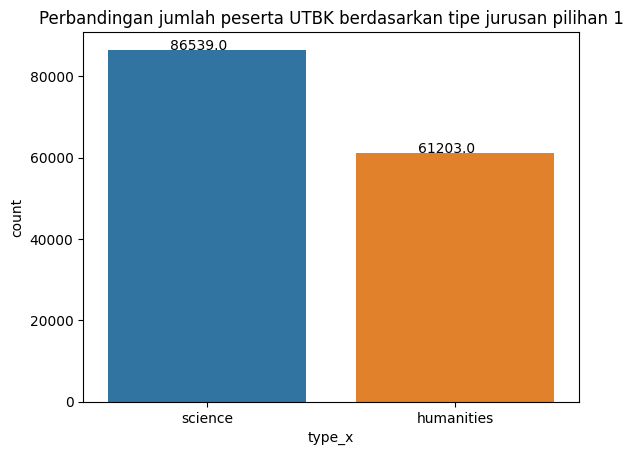

In [348]:
ax = sns.countplot(x="type_x", data=df_gabungan_type_pil1)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Perbandingan jumlah peserta UTBK berdasarkan tipe jurusan pilihan 1')
plt.show()

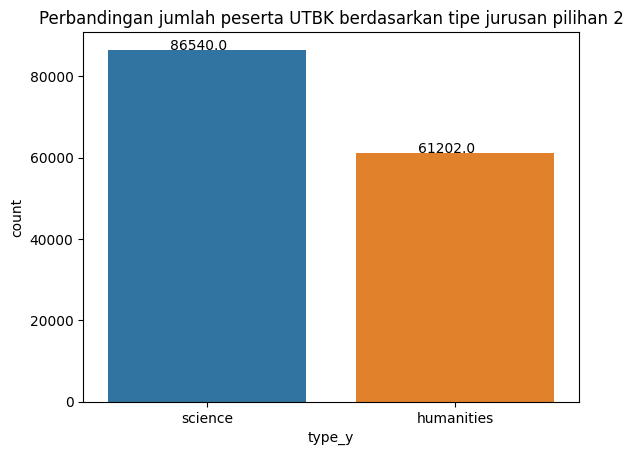

In [349]:
ax = sns.countplot(x="type_y", data=df_gabungan_type_pil2)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Perbandingan jumlah peserta UTBK berdasarkan tipe jurusan pilihan 2')
plt.show()

### 2. Visualisasikan Seluruh Jurusan yang Tersedia

In [350]:
# Science dan Humaniora
df_jurusan_name_only = df_major[['type', 'major_name']]
df_jurusan_name_only = df_jurusan_name_only.drop_duplicates(ignore_index=True)
df_jurusan_name_only_sci = df_jurusan_name_only[df_jurusan_name_only['type'] == 'science'].drop_duplicates(ignore_index=True)
df_jurusan_name_only_sci = df_jurusan_name_only_sci.sort_values(by=['major_name'], ignore_index=True)
df_jurusan_name_only_hum = df_jurusan_name_only[df_jurusan_name_only['type'] == 'humanities'].drop_duplicates(ignore_index=True)
df_jurusan_name_only_hum = df_jurusan_name_only_hum.sort_values(by=['major_name'], ignore_index=True)
df_jurusan_name_only = pd.concat([df_jurusan_name_only_sci, df_jurusan_name_only_hum], ignore_index=True)
display(df_jurusan_name_only)
display(df_jurusan_name_only_sci)
display(df_jurusan_name_only_hum)

,type,major_name
0,science,AGRIBISNIS
1,science,AGRIBISNIS
2,science,AGRIBISNIS (PSDKU KEDIRI)
3,science,AGRIBISNIS PERIKANAN
4,science,AGROBISNIS PERIKANAN
...,...,...
861,humanities,TEKNOLOGI PENDIDIKAN
862,humanities,TELEVISI & FILM
863,humanities,TELEVISI DAN FILM
864,humanities,TRADISI LISAN


,type,major_name
0,science,AGRIBISNIS
1,science,AGRIBISNIS
2,science,AGRIBISNIS (PSDKU KEDIRI)
3,science,AGRIBISNIS PERIKANAN
4,science,AGROBISNIS PERIKANAN
...,...,...
374,science,TEKNOLOGI INFORMASI
375,science,TEKNOLOGI PANGAN
376,science,TEKNOLOGI PANGAN DAN HASIL PERTANIAN
377,science,TEKNOLOGI PERTANIAN


,type,major_name
0,humanities,ADM. NEGARA
1,humanities,ADMINISTRASI BISNIS
2,humanities,ADMINISTRASI BISNIS PSDKU PANGANDARAN
3,humanities,ADMINISTRASI BISNIS/NIAGA
4,humanities,ADMINISTRASI NEGARA
...,...,...
482,humanities,TEKNOLOGI PENDIDIKAN
483,humanities,TELEVISI & FILM
484,humanities,TELEVISI DAN FILM
485,humanities,TRADISI LISAN


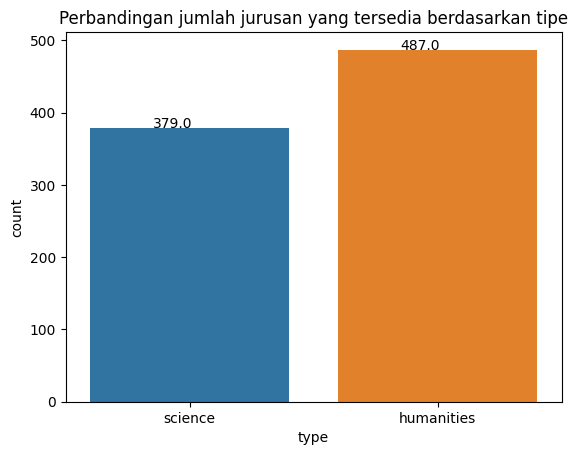

In [351]:
ax = sns.countplot(x="type", data=df_jurusan_name_only)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Perbandingan jumlah jurusan yang tersedia berdasarkan tipe')
plt.show()

Dapat dilihat dari visualisasi diatas bahwa terdapat total 866 jurusan yang dapat peserta utbk pilih. Kemudian, dari 866 jurusan tersebut 379 merupakan jurusan Sains dan 487-nya merupakan jurusan Humaniora. Hal ini menandakan lebih banyak opsi yang dapat dipilih pada jurusan Humaniora.

### 3. Visualisasikan Jurusan yang Dipilih Peserta

#### Science

In [352]:
# Science
df_jurusan_terpilih_sci_pil1 = cleaned_sci[['type_x', 'major_name_x']]
df_jurusan_terpilih_sci_pil1 = df_jurusan_terpilih_sci_pil1.drop_duplicates(ignore_index=True)
df_jurusan_terpilih_sci_pil1 = df_jurusan_terpilih_sci_pil1.rename(columns={'type_x':'type', 'major_name_x':'major_name'})
df_jurusan_terpilih_sci_pil2 = cleaned_sci[['type_y', 'major_name_y']]
df_jurusan_terpilih_sci_pil2 = df_jurusan_terpilih_sci_pil2.drop_duplicates(ignore_index=True)
df_jurusan_terpilih_sci_pil2 = df_jurusan_terpilih_sci_pil2.rename(columns={'type_y':'type', 'major_name_y':'major_name'})
df_jurusan_terpilih_sci = pd.concat([df_jurusan_terpilih_sci_pil1, df_jurusan_terpilih_sci_pil2], ignore_index=True)
df_jurusan_terpilih_sci = df_jurusan_terpilih_sci.sort_values(by=['major_name'], ignore_index=True)
df_jurusan_terpilih_sci = df_jurusan_terpilih_sci.drop_duplicates(ignore_index=True)
df_jurusan_terpilih_sci
df_jurusan_terpilih_sci.drop_duplicates(ignore_index=True).groupby(['type']).count()

,major_name
type,
humanities,5
science,362


Ditemukan bahwa ada yang memilih jurusan humaniora pada peserta utbk sains. Sehingga untuk eksplorasi ini akan kita pisahkan agar mendapatkan semua jurusan sains saja.

In [353]:
df_jurusan_terpilih_sci_murni = df_jurusan_terpilih_sci[df_jurusan_terpilih_sci['type'] == 'science']
df_jurusan_terpilih_sci_murni.drop_duplicates(ignore_index=True).groupby(['type']).count()

,major_name
type,
science,362


Hal ini menimbulkan kemungkinan lain bahwa pada data UTBK humaniora terdapat peserta yang memilih jurusan sains yang tidak terdapat pada data yang telah ada pada UTBK sains. Sehingga selanjutnya akan dicek kemungkinan tersebut.

In [354]:
# Humanities
df_jurusan_terpilih_hum_pil1 = cleaned_hum[['type_x', 'major_name_x']]
df_jurusan_terpilih_hum_pil1 = df_jurusan_terpilih_hum_pil1.drop_duplicates(ignore_index=True)
df_jurusan_terpilih_hum_pil1 = df_jurusan_terpilih_hum_pil1.rename(columns={'type_x':'type', 'major_name_x':'major_name'})
df_jurusan_terpilih_hum_pil2 = cleaned_hum[['type_y', 'major_name_y']]
df_jurusan_terpilih_hum_pil2 = df_jurusan_terpilih_hum_pil2.drop_duplicates(ignore_index=True)
df_jurusan_terpilih_hum_pil2 = df_jurusan_terpilih_hum_pil2.rename(columns={'type_y':'type', 'major_name_y':'major_name'})
df_jurusan_terpilih_hum = pd.concat([df_jurusan_terpilih_hum_pil1, df_jurusan_terpilih_hum_pil2], ignore_index=True)
df_jurusan_terpilih_hum = df_jurusan_terpilih_hum.sort_values(by=['major_name'], ignore_index=True)
df_jurusan_terpilih_hum = df_jurusan_terpilih_hum.drop_duplicates(ignore_index=True)
df_jurusan_terpilih_hum
df_jurusan_terpilih_hum.drop_duplicates(ignore_index=True).groupby(['type']).count()

,major_name
type,
humanities,462


Aman, tidak ada peserta UTBK Humaniora yang memilih jurusan sains.

In [355]:
# menambahkan status terpilih/tidak terpilih
df_jurusan_terpilih_sci_murni['status'] = "Terpilih"
df_jurusan_terpilih_sci_murni.drop_duplicates(ignore_index=True).groupby(['status']).count()
df_jurusan_name_only_sci_ratio = df_jurusan_name_only_sci.merge(df_jurusan_terpilih_sci_murni.drop(columns=['type']), how="left", on="major_name").drop_duplicates()
df_jurusan_name_only_sci_ratio.drop_duplicates(ignore_index=True).groupby(['status']).count()
df_jurusan_name_only_sci_ratio['status'] = df_jurusan_name_only_sci_ratio['status'].fillna('Tidak Terpilih')
df_jurusan_name_only_sci_ratio

C:\Users\eji\AppData\Local\Temp\ipykernel_12412\4177800289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jurusan_terpilih_sci_murni['status'] = "Terpilih"


,type,major_name,status
0,science,AGRIBISNIS,Terpilih
1,science,AGRIBISNIS,Terpilih
2,science,AGRIBISNIS (PSDKU KEDIRI),Terpilih
3,science,AGRIBISNIS PERIKANAN,Terpilih
4,science,AGROBISNIS PERIKANAN,Terpilih
...,...,...,...
374,science,TEKNOLOGI INFORMASI,Terpilih
375,science,TEKNOLOGI PANGAN,Terpilih
376,science,TEKNOLOGI PANGAN DAN HASIL PERTANIAN,Terpilih
377,science,TEKNOLOGI PERTANIAN,Terpilih


,type,major_name
status,,
Terpilih,362,362
Tidak Terpilih,17,17


<AxesSubplot: title={'center': 'Jurusan Science'}>

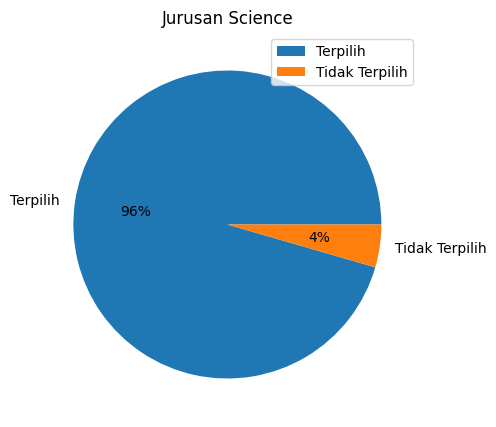

In [356]:
# visualisasi
display(df_jurusan_name_only_sci_ratio.groupby(['status']).count())
df_jurusan_name_only_sci_ratio.groupby(['status']).count().plot.pie(y='major_name', figsize=(5, 5), autopct='%1.0f%%', ylabel="", title="Jurusan Science")

Dapat dilihat berdasarkan visualisasi diatas bahwa peserta UTBK sains baru memilih 96% dari total keseluruhan jurusan yang bisa diambil. Terdapat sebanyak 17 jurusan yang tidak dipilih oleh peserta UTBK sains manapun. Daftar jurusan tersebut dapat dilihat pada tabel di bawah ini.

In [357]:
tidak_terpilih_sci = df_jurusan_name_only_sci_ratio[df_jurusan_name_only_sci_ratio.status != "Terpilih"].reset_index().drop(columns=['index'])
display(tidak_terpilih_sci)

,type,major_name,status
0,science,AGROTEKNOLOGI (PSDKU MOROWALI),Tidak Terpilih
1,science,AGROTEKNOLOGI (PSDKU TOUNA),Tidak Terpilih
2,science,ILMU FISIKA,Tidak Terpilih
3,science,ILMU KIMIA,Tidak Terpilih
4,science,PEMANFAATAN SUMBERDAYA PERAIRAN,Tidak Terpilih
5,science,PEMULIAAN TANAMAN,Tidak Terpilih
6,science,PEND. TEK ELEKTRO,Tidak Terpilih
7,science,PEND. TEK MESIN,Tidak Terpilih
8,science,PENDIDIKAN MATEMATIKA (PSDKU KAB. ARU),Tidak Terpilih
9,science,PENDIDIKAN MATEMATIKA (PSDKU KAB. MBD),Tidak Terpilih


In [358]:
# untuk memastikan bahwa jurusan diatas benar-benar tidak dipilih oleh siapapun
new = cleaned_sci[(cleaned_sci['major_name_x'] == 'ILMU FISIKA') | (cleaned_sci['major_name_y'] == 'ILMU FISIKA')]
new
# berhasil

,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,id_major_x,major_name_x,university_name_x,type_x,capacity_x,id_major_y,major_name_y,university_name_y,type_y,capacity_y


#### Humanities

In [359]:
df_jurusan_terpilih_hum.drop_duplicates(ignore_index=True).groupby(['type']).count()

,major_name
type,
humanities,462


Walaupun tidak ditemukan bahwa ada yang memilih jurusan sains pada peserta UTBK Humaniora. Namun, berdasarkan eksplorasi sebelumnya ditemukan jurusan humaniora dipilih pada UTBK Sains, sehingga akan dicek.

In [360]:
df_jurusan_terpilih_sci.drop_duplicates(ignore_index=True).groupby(['type']).count()

,major_name
type,
humanities,5
science,362


Ditemukan bahwa ada yang memilih jurusan humaniora pada peserta utbk sains. Sehingga untuk eksplorasi ini akan kita pisahkan agar mendapatkan semua jurusan humaniora saja.

In [361]:
df_jurusan_terpilih_hum_murni = df_jurusan_terpilih_sci[df_jurusan_terpilih_sci['type'] == 'humanities']
df_jurusan_terpilih_hum_murni.drop_duplicates(ignore_index=True).groupby(['type']).count()

,major_name
type,
humanities,5


Akan digabungkan kedalam data UTBK humaniora.

In [362]:
df_jurusan_terpilih_hum_murni = pd.concat([df_jurusan_terpilih_hum_murni, df_jurusan_terpilih_hum], ignore_index=True)
df_jurusan_terpilih_hum_murni = df_jurusan_terpilih_hum_murni.drop_duplicates()
df_jurusan_terpilih_hum_murni.drop_duplicates(ignore_index=True).groupby(['type']).count()

,major_name
type,
humanities,462


Sudah aman, sudah mengandung semua data jurusan humaniora.

In [363]:
# menambahkan status terpilih/tidak terpilih
df_jurusan_terpilih_hum_murni['status'] = "Terpilih"
df_jurusan_terpilih_hum_murni.drop_duplicates(ignore_index=True).groupby(['status']).count()
df_jurusan_name_only_hum_ratio = df_jurusan_name_only_hum.merge(df_jurusan_terpilih_hum_murni.drop(columns=['type']), how="left", on="major_name").drop_duplicates()
df_jurusan_name_only_hum_ratio.drop_duplicates(ignore_index=True).groupby(['status']).count()
df_jurusan_name_only_hum_ratio['status'] = df_jurusan_name_only_hum_ratio['status'].fillna('Tidak Terpilih')
df_jurusan_name_only_hum_ratio

,type,major_name,status
0,humanities,ADM. NEGARA,Terpilih
1,humanities,ADMINISTRASI BISNIS,Terpilih
2,humanities,ADMINISTRASI BISNIS PSDKU PANGANDARAN,Terpilih
3,humanities,ADMINISTRASI BISNIS/NIAGA,Terpilih
4,humanities,ADMINISTRASI NEGARA,Terpilih
...,...,...,...
482,humanities,TEKNOLOGI PENDIDIKAN,Terpilih
483,humanities,TELEVISI & FILM,Terpilih
484,humanities,TELEVISI DAN FILM,Terpilih
485,humanities,TRADISI LISAN,Tidak Terpilih


,type,major_name
status,,
Terpilih,462,462
Tidak Terpilih,25,25


<AxesSubplot: title={'center': 'Jurusan Humanities'}>

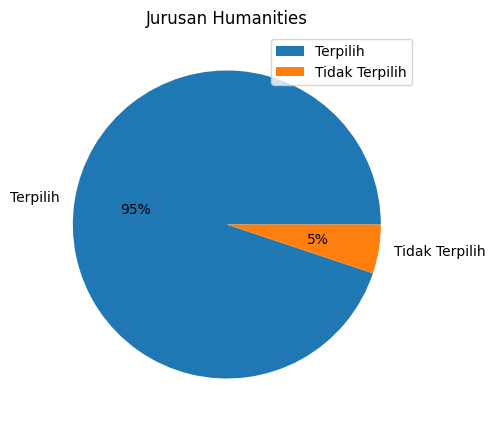

In [364]:
# visualisasi
display(df_jurusan_name_only_hum_ratio.groupby(['status']).count())
df_jurusan_name_only_hum_ratio.groupby(['status']).count().plot.pie(y='major_name', figsize=(5, 5), autopct='%1.0f%%', ylabel="", title="Jurusan Humanities")

Dapat dilihat berdasarkan visualisasi diatas bahwa peserta UTBK sains baru memilih 95% dari total keseluruhan jurusan yang bisa diambil. Terdapat sebanyak 25 jurusan yang tidak dipilih oleh peserta UTBK humaniora manapun. Daftar jurusan tersebut dapat dilihat pada tabel di bawah ini.

In [365]:
tidak_terpilih_hum = df_jurusan_name_only_hum_ratio[df_jurusan_name_only_hum_ratio.status != "Terpilih"].reset_index().drop(columns=['index'])
display(tidak_terpilih_hum)

,type,major_name,status
0,humanities,AKUNTANSI (PSDKU KAB. ARU),Tidak Terpilih
1,humanities,AKUNTANSI (PSDKU KAB. MBD),Tidak Terpilih
2,humanities,EKO. PEMBANGUNAN,Tidak Terpilih
3,humanities,ILMU HUKUM (PSDKU KAB. ARU),Tidak Terpilih
4,humanities,ILMU HUKUM (PSDKU KAB. MBD),Tidak Terpilih
5,humanities,MANAJEMEN (PSDKU TOUNA),Tidak Terpilih
6,humanities,PEND. BAH. JERMAN,Tidak Terpilih
7,humanities,PEND. BAHASA INGGRIS (PSDKU KAB. ARU),Tidak Terpilih
8,humanities,PEND. BAHASA INGGRIS (PSDKU KAB. MBD),Tidak Terpilih
9,humanities,PEND. BAHASA JERMAN,Tidak Terpilih


In [366]:
# untuk memastikan bahwa jurusan diatas benar-benar tidak dipilih oleh siapapun
new = cleaned_hum[(cleaned_hum['major_name_x'] == 'PLS') | (cleaned_hum['major_name_y'] == 'PLS')]
new
# berhasil

,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,id_major_x,major_name_x,university_name_x,type_x,capacity_x,id_major_y,major_name_y,university_name_y,type_y,capacity_y


### 4. Jurusan Mana yang Paling Banyak Dipilih

In [367]:
df_jurusan_terpilih_sci_name = cleaned_sci[['major_name_x','type_x','major_name_y', 'type_y']]

df_jurusan_terpilih_sci_name['major_name_y'] = df_jurusan_terpilih_sci_name.apply(lambda x: "-" if x['major_name_x'] ==
                     x['major_name_y']  else x['major_name_y'], axis=1)

new = df_jurusan_terpilih_sci_name[(df_jurusan_terpilih_sci_name['major_name_y'] == "-")]
new

# display(df_jurusan_terpilih_sci_name)

C:\Users\eji\AppData\Local\Temp\ipykernel_12412\4124781843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jurusan_terpilih_sci_name['major_name_y'] = df_jurusan_terpilih_sci_name.apply(lambda x: "-" if x['major_name_x'] ==


,major_name_x,type_x,major_name_y,type_y
14,PSIKOLOGI,science,-,science
135,PSIKOLOGI,science,-,science
136,PSIKOLOGI,science,-,science
179,PSIKOLOGI,science,-,science
180,PSIKOLOGI,science,-,science
...,...,...,...,...
86453,KEHUTANAN,science,-,science
86458,TEKNIK INFORMATIKA,science,-,science
86460,TEKNIK INFORMATIKA,science,-,science
86490,TEKNIK ELEKTRO,science,-,science


#### UTBK Science

In [368]:
df_jurusan_terpilih_sci_pil1 = df_jurusan_terpilih_sci_name[['type_x','major_name_x']]
df_jurusan_terpilih_sci_pil1 = df_jurusan_terpilih_sci_pil1.rename(columns={'type_x':'type', 'major_name_x':'major_name'})
df_jurusan_terpilih_sci_pil2 = df_jurusan_terpilih_sci_name[['type_y', 'major_name_y']]
df_jurusan_terpilih_sci_pil2 = df_jurusan_terpilih_sci_pil2.rename(columns={'type_y':'type', 'major_name_y':'major_name'})
df_jurusan_terpilih_sci = pd.concat([df_jurusan_terpilih_sci_pil1, df_jurusan_terpilih_sci_pil2], ignore_index=True)
display(df_jurusan_terpilih_sci.groupby(['major_name']).count().sort_values(by='type', ascending=False))

,type
major_name,
-,13910
PENDIDIKAN DOKTER,7438
TEKNIK SIPIL,5414
FARMASI,4896
TEKNIK INFORMATIKA,4365
...,...
AGRONOMI/AGROEKOTEKNOLOGI,1
OSEANOGRAFI,1
PEND. TEK BANGUNAN,1


In [377]:
df_jurusan_terpilih_sci_top10 = df_jurusan_terpilih_sci.groupby(['major_name']).count().sort_values(by='type', ascending=False).head(10).reset_index()
df_jurusan_terpilih_sci_top10
df_jurusan_terpilih_sci_top10_name = df_jurusan_terpilih_sci_top10['major_name'].to_list()
# functio untuk filter

filtered_df_sci = df_jurusan_terpilih_sci[df_jurusan_terpilih_sci['major_name'].isin(df_jurusan_terpilih_sci_top10_name)].reset_index().drop(columns=['index'])
display(filtered_df_sci)

,type,major_name
0,science,PENDIDIKAN DOKTER
1,science,PENDIDIKAN DOKTER
2,science,PENDIDIKAN DOKTER
3,science,PENDIDIKAN DOKTER
4,science,PENDIDIKAN DOKTER
...,...,...
54956,science,-
54957,science,BIOLOGI
54958,science,AGRIBISNIS
54959,science,-


In [383]:
filtered_df_sci_cleaned = filtered_df_sci.drop(filtered_df_sci[filtered_df_sci['major_name'] == '-'].index)
display(filtered_df_sci_cleaned)

,type,major_name
0,science,PENDIDIKAN DOKTER
1,science,PENDIDIKAN DOKTER
2,science,PENDIDIKAN DOKTER
3,science,PENDIDIKAN DOKTER
4,science,PENDIDIKAN DOKTER
...,...,...
54954,science,BIOLOGI
54955,science,TEKNIK ELEKTRO
54957,science,BIOLOGI
54958,science,AGRIBISNIS


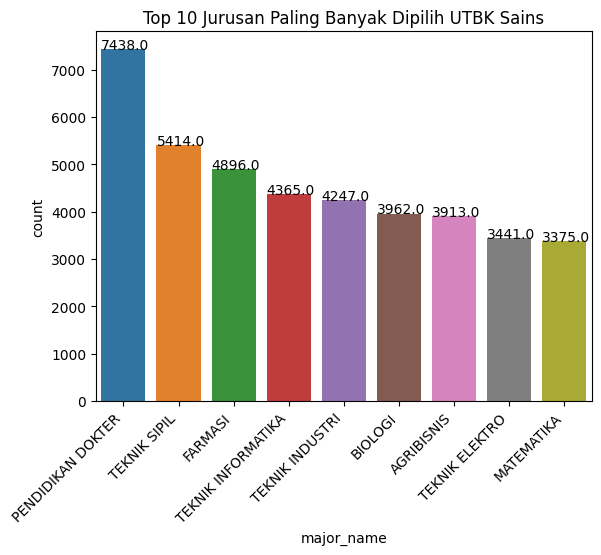

In [384]:
ax = sns.countplot(x="major_name", data=filtered_df_sci_cleaned, order=filtered_df_sci_cleaned['major_name'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.05))
plt.title('Top 10 Jurusan Paling Banyak Dipilih UTBK Sains')
plt.show()

#### UTBK Humanities

In [385]:
df_jurusan_terpilih_hum_name = cleaned_hum[['major_name_x','type_x','major_name_y', 'type_y']]

df_jurusan_terpilih_hum_name['major_name_y'] = df_jurusan_terpilih_hum_name.apply(lambda x: "-" if x['major_name_x'] ==
                     x['major_name_y']  else x['major_name_y'], axis=1)

new = df_jurusan_terpilih_hum_name[(df_jurusan_terpilih_hum_name['major_name_y'] == "-")]
new

# display(df_jurusan_terpilih_sci_name)

C:\Users\eji\AppData\Local\Temp\ipykernel_12412\2092302527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jurusan_terpilih_hum_name['major_name_y'] = df_jurusan_terpilih_hum_name.apply(lambda x: "-" if x['major_name_x'] ==


,major_name_x,type_x,major_name_y,type_y
45,DESAIN KOMUNIKASI VISUAL,humanities,-,humanities
46,DESAIN KOMUNIKASI VISUAL,humanities,-,humanities
74,DESAIN KOMUNIKASI VISUAL,humanities,-,humanities
75,DESAIN KOMUNIKASI VISUAL,humanities,-,humanities
79,DESAIN KOMUNIKASI VISUAL,humanities,-,humanities
...,...,...,...,...
61120,SENI PEDALANGAN,humanities,-,humanities
61136,MANAJEMEN,humanities,-,humanities
61137,MANAJEMEN,humanities,-,humanities
61147,AKUNTANSI,humanities,-,humanities


In [386]:
df_jurusan_terpilih_hum_pil1 = df_jurusan_terpilih_hum_name[['type_x', 'major_name_x']]
df_jurusan_terpilih_hum_pil1 = df_jurusan_terpilih_hum_pil1.rename(columns={'type_x':'type', 'major_name_x':'major_name'})
df_jurusan_terpilih_hum_pil2 = df_jurusan_terpilih_hum_name[['type_y', 'major_name_y']]
df_jurusan_terpilih_hum_pil2 = df_jurusan_terpilih_hum_pil2.rename(columns={'type_y':'type', 'major_name_y':'major_name'})
df_jurusan_terpilih_hum = pd.concat([df_jurusan_terpilih_hum_pil1, df_jurusan_terpilih_hum_pil2], ignore_index=True)
display(df_jurusan_terpilih_hum.groupby(['major_name']).count().sort_values(by='type', ascending=False))

,type
major_name,
-,9293
MANAJEMEN,8945
ILMU HUKUM,7057
ILMU KOMUNIKASI,6722
AKUNTANSI,6043
...,...
"PENDIDIKAN JASMANI, KESEHATAN DAN REKREASI",1
PENDIDIKAN KEPELATIHAN,1
PLB/P.KH,1


In [391]:
df_jurusan_terpilih_hum_top10 = df_jurusan_terpilih_hum.groupby(['major_name']).count().sort_values(by='type', ascending=False).head(10).reset_index()
df_jurusan_terpilih_hum_top10
df_jurusan_terpilih_hum_top10_name = df_jurusan_terpilih_hum_top10['major_name'].to_list()
# functio untuk filter

filtered_df_hum = df_jurusan_terpilih_hum[df_jurusan_terpilih_hum['major_name'].isin(df_jurusan_terpilih_hum_top10_name)].reset_index().drop(columns=['index'])
display(filtered_df_hum)

,type,major_name
0,humanities,SASTRA INGGRIS
1,humanities,ILMU HUKUM
2,humanities,ILMU HUKUM
3,humanities,ILMU KOMUNIKASI
4,humanities,ILMU HUKUM
...,...,...
54080,humanities,SOSIOLOGI
54081,humanities,MANAJEMEN
54082,humanities,ILMU HUKUM
54083,humanities,ILMU HUKUM


In [392]:
filtered_df_hum_cleaned = filtered_df_hum.drop(filtered_df_hum[filtered_df_hum['major_name'] == '-'].index)
display(filtered_df_hum_cleaned)

,type,major_name
0,humanities,SASTRA INGGRIS
1,humanities,ILMU HUKUM
2,humanities,ILMU HUKUM
3,humanities,ILMU KOMUNIKASI
4,humanities,ILMU HUKUM
...,...,...
54080,humanities,SOSIOLOGI
54081,humanities,MANAJEMEN
54082,humanities,ILMU HUKUM
54083,humanities,ILMU HUKUM


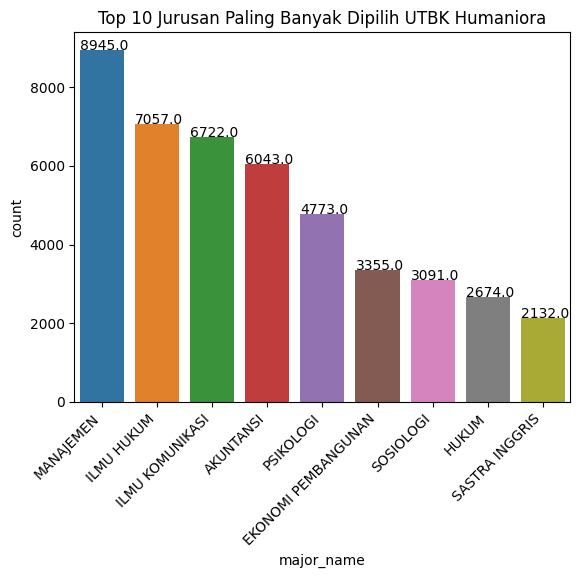

In [393]:
ax2 = sns.countplot(x="major_name", data=filtered_df_hum_cleaned, order=filtered_df_hum_cleaned['major_name'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.05))
plt.title('Top 10 Jurusan Paling Banyak Dipilih UTBK Humaniora')
plt.show()

### 5. Jurusan yang Paling Banyak Dipilih Dua Kali (Pilihan 1 & Pilihan 2)

#### UTBK Science

In [406]:
pilihan_sama_sci = cleaned_sci[(cleaned_sci['major_name_x'] == cleaned_sci['major_name_y'])]
pilihan_sama_sci_name = pilihan_sama_sci[['major_name_x','type_x','major_name_y', 'type_y']]
pilihan_sama_sci_name

,major_name_x,type_x,major_name_y,type_y
14,PSIKOLOGI,science,PSIKOLOGI,science
135,PSIKOLOGI,science,PSIKOLOGI,science
136,PSIKOLOGI,science,PSIKOLOGI,science
179,PSIKOLOGI,science,PSIKOLOGI,science
180,PSIKOLOGI,science,PSIKOLOGI,science
...,...,...,...,...
86453,KEHUTANAN,science,KEHUTANAN,science
86458,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science
86460,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science
86490,TEKNIK ELEKTRO,science,TEKNIK ELEKTRO,science


In [408]:
pilihan_sama_sci_name_top10 = pilihan_sama_sci_name.groupby(['major_name_x']).count().sort_values(by='type_x', ascending=False).head(10).reset_index()
pilihan_sama_sci_name_top10
pilihan_sama_sci_name_top10_name = pilihan_sama_sci_name_top10['major_name_x'].to_list()
# functio untuk filter

filtered_pilihan_sama_sci_name_top10 = pilihan_sama_sci_name[pilihan_sama_sci_name['major_name_x'].isin(pilihan_sama_sci_name_top10_name)].reset_index().drop(columns=['index'])
display(filtered_pilihan_sama_sci_name_top10)

,major_name_x,type_x,major_name_y,type_y
0,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science
1,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science
2,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science
3,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science
4,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science
...,...,...,...,...
7483,KIMIA,science,KIMIA,science
7484,KIMIA,science,KIMIA,science
7485,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science
7486,TEKNIK INFORMATIKA,science,TEKNIK INFORMATIKA,science


In [411]:
display(filtered_pilihan_sama_sci_name_top10.groupby(['major_name_x']).count().sort_values(by='type_x', ascending=False))

,type_x,major_name_y,type_y
major_name_x,,,
PENDIDIKAN DOKTER,1974,1974,1974
FARMASI,896,896,896
TEKNIK SIPIL,883,883,883
TEKNIK INDUSTRI,589,589,589
BIOLOGI,554,554,554
MATEMATIKA,550,550,550
TEKNIK ELEKTRO,534,534,534
TEKNIK INFORMATIKA,523,523,523
TEKNIK MESIN,497,497,497


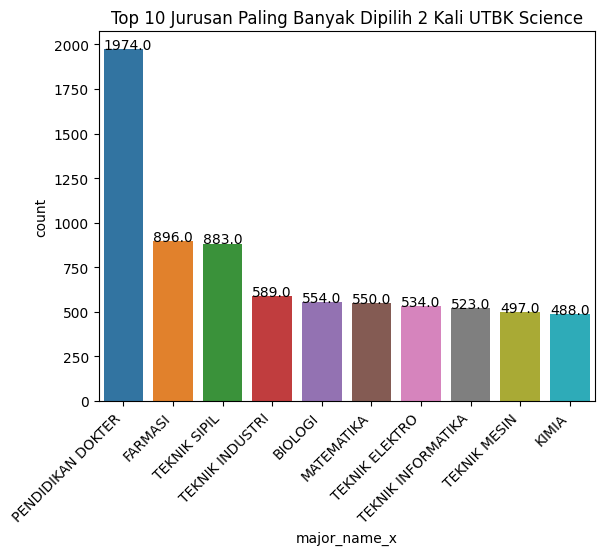

In [409]:
ax2 = sns.countplot(x="major_name_x", data=filtered_pilihan_sama_sci_name_top10, order=filtered_pilihan_sama_sci_name_top10['major_name_x'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.05))
plt.title('Top 10 Jurusan Paling Banyak Dipilih 2 Kali UTBK Science')
plt.show()

#### UTBK Humanities

In [410]:
pilihan_sama_hum = cleaned_hum[(cleaned_hum['major_name_x'] == cleaned_hum['major_name_y'])]
pilihan_sama_hum_name = pilihan_sama_hum[['major_name_x','type_x','major_name_y', 'type_y']]
pilihan_sama_hum_name

,major_name_x,type_x,major_name_y,type_y
45,DESAIN KOMUNIKASI VISUAL,humanities,DESAIN KOMUNIKASI VISUAL,humanities
46,DESAIN KOMUNIKASI VISUAL,humanities,DESAIN KOMUNIKASI VISUAL,humanities
74,DESAIN KOMUNIKASI VISUAL,humanities,DESAIN KOMUNIKASI VISUAL,humanities
75,DESAIN KOMUNIKASI VISUAL,humanities,DESAIN KOMUNIKASI VISUAL,humanities
79,DESAIN KOMUNIKASI VISUAL,humanities,DESAIN KOMUNIKASI VISUAL,humanities
...,...,...,...,...
61120,SENI PEDALANGAN,humanities,SENI PEDALANGAN,humanities
61136,MANAJEMEN,humanities,MANAJEMEN,humanities
61137,MANAJEMEN,humanities,MANAJEMEN,humanities
61147,AKUNTANSI,humanities,AKUNTANSI,humanities


In [412]:
pilihan_sama_hum_name_top10 = pilihan_sama_hum_name.groupby(['major_name_x']).count().sort_values(by='type_x', ascending=False).head(10).reset_index()
pilihan_sama_hum_name_top10
pilihan_sama_hum_name_top10_name = pilihan_sama_hum_name_top10['major_name_x'].to_list()
# functio untuk filter

filtered_pilihan_sama_hum_name_top10 = pilihan_sama_hum_name[pilihan_sama_hum_name['major_name_x'].isin(pilihan_sama_hum_name_top10_name)].reset_index().drop(columns=['index'])
display(filtered_pilihan_sama_hum_name_top10)

,major_name_x,type_x,major_name_y,type_y
0,SASTRA INGGRIS,humanities,SASTRA INGGRIS,humanities
1,SASTRA INGGRIS,humanities,SASTRA INGGRIS,humanities
2,SASTRA INGGRIS,humanities,SASTRA INGGRIS,humanities
3,SASTRA INGGRIS,humanities,SASTRA INGGRIS,humanities
4,SASTRA INGGRIS,humanities,SASTRA INGGRIS,humanities
...,...,...,...,...
7356,AKUNTANSI,humanities,AKUNTANSI,humanities
7357,MANAJEMEN,humanities,MANAJEMEN,humanities
7358,MANAJEMEN,humanities,MANAJEMEN,humanities
7359,AKUNTANSI,humanities,AKUNTANSI,humanities


In [413]:
display(filtered_pilihan_sama_hum_name_top10.groupby(['major_name_x']).count().sort_values(by='type_x', ascending=False))

,type_x,major_name_y,type_y
major_name_x,,,
MANAJEMEN,1547,1547,1547
AKUNTANSI,1425,1425,1425
ILMU HUKUM,1288,1288,1288
ILMU KOMUNIKASI,1216,1216,1216
PSIKOLOGI,855,855,855
EKONOMI PEMBANGUNAN,248,248,248
SOSIOLOGI,244,244,244
SASTRA INGGRIS,237,237,237
ILMU HUBUNGAN INTERNASIONAL,172,172,172


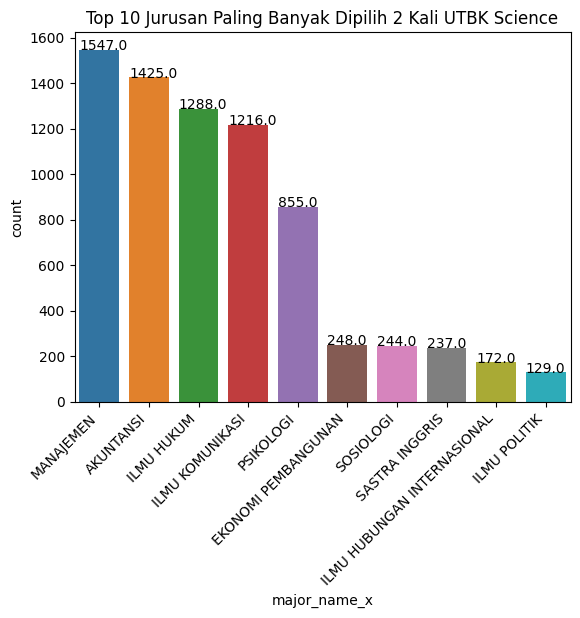

In [414]:
ax2 = sns.countplot(x="major_name_x", data=filtered_pilihan_sama_hum_name_top10, order=filtered_pilihan_sama_hum_name_top10['major_name_x'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.05))
plt.title('Top 10 Jurusan Paling Banyak Dipilih 2 Kali UTBK Science')
plt.show()

### 6. Dokter dan Farmasi